In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load all the data
data = LoadMLData(os.path.join(DATAPATH, "autosomal_estimates/perlocus", "autosomal_estimates_ml_filtered.bed.gz"))
lobref = pd.read_csv(os.path.join(DATAPATH, "ref","lobstr_v3.0.2_hg19_ref_nochr.bed.gz"), usecols=range(4),
                     names=["chrom","start","end","period"], sep="\t")
data = pd.merge(data, lobref, on=["chrom","start","end"])

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


1 -4.95584478408
2 -6.22599353172
3 -7.67431482405
4 -7.67432303317
5 -7.67432655997
6 -7.67432878378
1 0.714406577788
2 0.451797335318
3 0.458796199684
4 0.463700853663
5 0.449480198166
6 0.430144223929
1 0.999936733838
2 0.917752596012
3 0.943999764212
4 0.947660136897
5 0.942700713101
6 0.935523655607


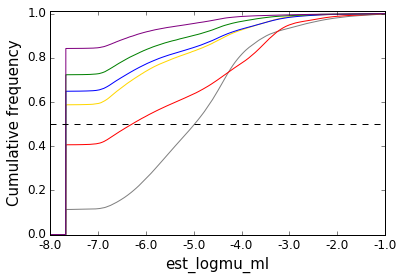

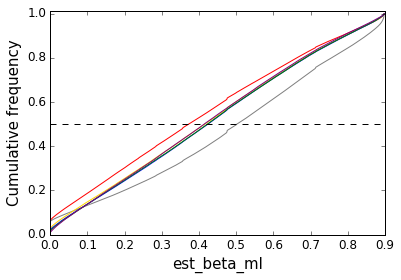

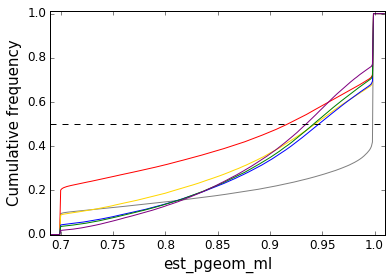

In [4]:
colordict = {
    1: "gray",
    2: "red",
    3: "gold",
    4: "blue",
    5: "green",
    6: "purple"
}

def PlotCDF(data, column, colordict, xlim=(-8, -1), figname=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for period in colordict.keys():
        x = data[data["period"]==period][column].values
        counts, bins = np.histogram(x, bins=np.arange(xlim[0], xlim[1], 0.001))
        counts = counts*1.0/np.sum(counts)
        counts = np.cumsum(counts)
        ax.plot(bins[:-1], counts, color=colordict[period])
        print period, np.median(x)
    ax.set_xlim(left=xlim[0], right=xlim[1])
    ax.set_ylim(bottom=0, top=1.01)   
    ax.axhline(y=0.5, color="black", linestyle="dashed")
    ax.set_xlabel(column, size=15)
    ax.set_ylabel("Cumulative frequency", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    if figname is not None: fig.savefig(figname)
    
# Logmu - CDF by period
PlotCDF(data, "est_logmu_ml", colordict, figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_mu.pdf"))

# Beta - CDF by period
PlotCDF(data, "est_beta_ml", colordict, xlim=(0, 0.9), figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_beta.pdf"))

# Pgeom - CDF by period
PlotCDF(data, "est_pgeom_ml", colordict, xlim=(0.69, 1.01), figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_p.pdf"))